# Plot the DAG of the learned Bayesian network

In [1]:
# To manipulate the DAG object
import bnlearn as bn

# Plotting librairies
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl

Import the trained model

In [2]:
from joblib import load
import os

# Define the parent directory
parent_dir = os.path.abspath(
    os.path.join(os.getcwd(), os.pardir, os.pardir)
)

# Define the subfolder directory
output_folder = os.path.join(
    parent_dir, "outputs"
)

# Name of the model output file
file_name = "BayesNet-fit.joblib"

# Create the full path
output_path = os.path.join(
    output_folder, file_name

)

DAG = load(output_path)

## Plot the DAG

The colour gradient is based on the chi-squared test to indicate edge strength.

[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.


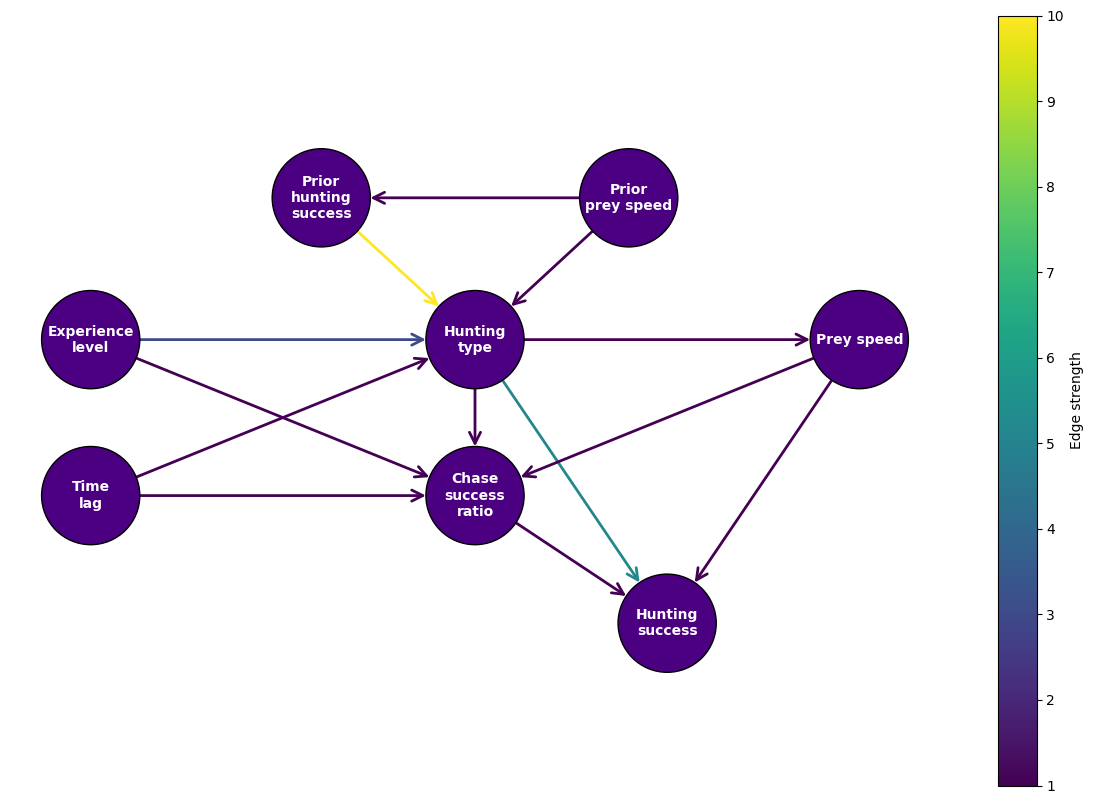

In [3]:
# Get edge properties from the DAG
edge_properties = bn.get_edge_properties(DAG)

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights based on chi-square test results
for edge, properties in edge_properties.items():
    strength = properties.get("weight", 0)
    G.add_edge(*edge, weight = strength)

# Manually specify node names
node_mapping = {
    "hunting_type": "Hunting\ntype",
    "hunting_success": "Hunting\nsuccess",
    "prey_avg_speed_bin": "Prey speed",
    "prior_prey_speed_bin": "Prior\nprey speed",
    "prior_success": "Prior\nhunting\nsuccess",
    "chase_success_ratio_bin": "Chase\nsuccess\nratio",
    "time_lag_bin": "Time\nlag",
    "xp_level": "Experience\nlevel"
}
G = nx.relabel_nodes(G, node_mapping)

# Define positions for the nodes
pos = {
    "Experience\nlevel": (0.5, 0),
    "Prior\nhunting\nsuccess": (0.8, 0.005),
    "Prior\nprey speed": (1.2, 0.005),
    "Time\nlag": (0.5, -0.0055),
    "Hunting\ntype": (1, 0),
    "Prey speed": (1.5, 0),
    "Chase\nsuccess\nratio": (1, -0.0055),
    "Hunting\nsuccess": (1.25, -0.01),
}

# Set a fixed larger size for nodes
node_size = 5000
node_sizes = [node_size for _ in range(len(G))]

# Define edge colors and transparency
M = G.number_of_edges()
edge_colors = [
    properties["weight"] for u, v,
    properties in G.edges(data = True)
]
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

# Use viridis colormap
cmap = plt.cm.viridis

# Plot size
plt.figure(figsize = (15, 10))

# Draw the DAG
nodes = nx.draw_networkx_nodes(
    G,
    pos,
    node_size = node_sizes,
    node_color = "indigo",
    edgecolors = "black"
)

edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size = node_sizes,
    arrowstyle = "->",
    arrowsize = 20,
    edge_color = edge_colors,
    edge_cmap = cmap,
    width = 2,
)

# set alpha value for each edge
#for i in range(M):
#    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap = cmap)
pc.set_array(edge_colors)

# Display node labels
node_labels = nx.draw_networkx_labels(
    G, pos,
    font_size = 10,
    font_weight = "bold",
    font_color = "white"
)

# Display the figure
ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax = ax, label = "Edge strength")
plt.show()